<a href="https://colab.research.google.com/github/OKOMKAMARA/udacity_notebook/blob/main/Copy_of_AIPND_image_classifier_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Code Explanation:

- **Setting Up Flower Dataset:**
  - `data_dir = './flowers'`: Defines the directory path for the flower dataset.
  - `FLOWERS_DIR = Path(data_dir)`: Uses `Path` from `pathlib` for handling PosixPath.

- **Downloading and Extracting Dataset:**
  - `if not FLOWERS_DIR.is_dir()`: Checks if the dataset directory exists.
    - `FLOWERS_DIR.mkdir(parents=True, exist_ok=True)`: Creates the directory if not present.
  - `TARBALL = FLOWERS_DIR / "flower_data.tar.gz"`: Defines the tarball path.
  - Downloads and extracts the dataset if not already present:
    - `request = requests.get(...)`: Downloads the 'flower_data.tar.gz' file.
    - `with open(TARBALL, "wb") as file_ref`: Writes the downloaded content to the tarball.
    - `with tarfile.open(TARBALL, "r") as tar_ref`: Extracts the tarball contents to the dataset directory.

- **Cleaning Up:**
  - `os.remove(TARBALL)`: Deletes the downloaded tarball to save space.

- **Status Messages:**
  - Prints informative messages about the directory creation, download, extraction, and cleanup.


In [1]:
# imports
import os
import requests
from pathlib import Path
import tarfile

# defining dataset directory
data_dir = './flowers'

# using pathlib.Path for handling PosixPath
FLOWERS_DIR = Path(data_dir)

# downloading and setting up data if not already present
if not FLOWERS_DIR.is_dir():
    # creating directory
    FLOWERS_DIR.mkdir(parents=True, exist_ok=True)
    print(f"[INFO] Directory created: ./{FLOWERS_DIR}")

    print() # for readability

    # tarball path
    TARBALL = FLOWERS_DIR / "flower_data.tar.gz"

    # downloading and writing the tarball to './flowers' directory
    print(f"[INFO] Downloading the file 'flower_data.tar.gz' to ./{FLOWERS_DIR}")
    request = requests.get('https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz')
    with open(TARBALL, "wb") as file_ref:
        file_ref.write(request.content)
        print(f"[INFO] 'flower_data.tar.gz' saved to ./{FLOWERS_DIR}")

    print() # for readability

    # extracting the downloaded tarball
    print(f"[INFO] Extracting the downloaded tarball to ./{FLOWERS_DIR}")
    with tarfile.open(TARBALL, "r") as tar_ref:
        tar_ref.extractall(FLOWERS_DIR)
        print(f"[INFO] 'flower_data.tar.gz' extracted successfully to ./{FLOWERS_DIR}")

    print() # for readability

    # using os.remove to delete the downloaded tarball
    print("[INFO] Deleting the tarball to save space.")
    os.remove(TARBALL)
else:
    print(f"[INFO] Dataset already setup at ./{FLOWERS_DIR}")

[INFO] Directory created: ./flowers

[INFO] Downloading the file 'flower_data.tar.gz' to ./flowers
[INFO] 'flower_data.tar.gz' saved to ./flowers

[INFO] Extracting the downloaded tarball to ./flowers
[INFO] 'flower_data.tar.gz' extracted successfully to ./flowers

[INFO] Deleting the tarball to save space.


In [20]:
%%shell
jupyter nbconvert --to html /content/AIPND_image_classifier_project.ipynb

[NbConvertApp] Converting notebook /content/AIPND_image_classifier_project.ipynb to html
[NbConvertApp] Writing 670724 bytes to /content/AIPND_image_classifier_project.html


### Code Explanation:

- **Creating a JSON File for Flower Categories:**
  - `data`: Defines a dictionary containing numerical keys and corresponding flower names.
  - `with open('cat_to_name.json', 'w') as file`: Opens the file 'cat_to_name.json' for writing.
  - `json.dump(data, file)`: Writes the dictionary data to the JSON file.

- **Interpreting the Output:**
  - The code creates a JSON file named 'cat_to_name.json' that serves as a mapping between numerical keys and flower names. This mapping can be useful for associating numerical labels with human-readable names in machine learning tasks.


In [2]:
import json

data = {
    "21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster",
    "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy",
    "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly",
    "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist",
    "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower",
    "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation",
    "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone",
    "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow",
    "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid",
    "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia",
    "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura",
    "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium",
    "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily",
    "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william",
    "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon",
    "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula",
    "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower",
    "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple",
    "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus",
    "88": "cyclamen", "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily",
    "46": "wallflower", "77": "passion flower", "51": "petunia"
}

with open('cat_to_name.json', 'w') as file:
    json.dump(data, file)

In [3]:
# Imports here
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models
import torchvision.models as models
from PIL import Image
import json
from collections import OrderedDict

%matplotlib inline

In [4]:
data_dir = 'flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [5]:
# TODO: Define your transforms for the training, validation, and testing sets
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                     transforms.RandomResizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406],
                                                         [0.229, 0.224, 0.225])
                                     ])

validation_transforms = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406],
                                                        [0.229, 0.224, 0.225])
                                     ])
test_transforms = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406],
                                                       [0.229, 0.224, 0.225])
                                      ])



# TODO: Load the datasets with ImageFolder
image_datasets = [datasets.ImageFolder(train_dir, transform = train_transforms),
                 datasets.ImageFolder(valid_dir, transform = validation_transforms),
                 datasets.ImageFolder(test_dir, transform = test_transforms)]


# TODO: Using the image datasets and the trainforms, define the dataloaders
dataloaders = [torch.utils.data.DataLoader(image_datasets[0], batch_size = 64, shuffle = True),
              torch.utils.data.DataLoader(image_datasets[1], batch_size = 64),
              torch.utils.data.DataLoader(image_datasets[2], batch_size = 64)]

In [6]:
import json

with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

In [7]:
# TODO: Build and train your network

# Use GPU if it's available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Load the pre-trained network VGG16
model = models.vgg16(pretrained = True)

model




cuda


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 157MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [8]:
# Define a new, untrained feed-forward network as a classifier, using RElU activations and dropout

# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False

# Define the new classifier for the model

classifier = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(25088, 4096)),
    ('relu', nn.ReLU()),
    ('dropout', nn.Dropout(0.2)),
    ('fc2', nn.Linear(4096, 512)),
    ('relu', nn.ReLU()),
    ('fc3', nn.Linear(512, 102)),
    ('output', nn.LogSoftmax(dim = 1))
]))

# Update the classifier in the model
model.classifier = classifier

model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [9]:
#  Move the model to Cuda
model = model.to(device)

# Define the learning rate
learning_rate = 0.001

# Define the loss
criterion = nn.NLLLoss()

# Only train the classifier parameters, featur paramaters are forzen
optimizer = optim.Adam(model.classifier.parameters(), lr = learning_rate)

In [10]:
# Train the classifier layers using backpropagation using the pre-trained network to get the features
# Track the loss and accuracy on the validation set to determine the best hyperparameters
# 0 = train, # 1 = validation, # 2 = test
import time

epochs = 1
print_every = 10
steps =0

start = time.time()
print('Starting training')

for e in range(epochs):
    running_loss = 0
    for ii, (inputs, labels) in enumerate(dataloaders[0]):
        steps += 1

#        Move input and label tensors to the defaults device (use cuda)
        inputs, labels = inputs.to(device), labels.to(device)

#        Zeros the gradiets on each training pass
        optimizer.zero_grad()

#        Forward and backward passes
        outputs = model.forward(inputs)
#        Use the logits to calculate the loss
        loss = criterion(outputs, labels)
#        Perform a backward pass through the network to calculate the gradients
        loss.backward()
#        Take a step with the optimizer to update the weights

        optimizer.step()

#        Calculate the training loss
        running_loss += loss.item()

    else:
        model.eval()
        valloss = 0
        accuracy = 0

        for ii, (inputs2, labels2) in enumerate(dataloaders[1]):
            optimizer.zero_grad()

            inputs2, labels2 = inputs2.to(device), labels2.to(device)
            logps = model(inputs2)
            valloss += criterion(logps, labels2)
            ps = torch.exp(logps).data
            top_ps, top_class = ps.topk(1, dim = 1)
            equality = top_class == labels2.view(*top_class.shape)
            accuracy += torch.mean(equality.type(torch.FloatTensor))
        print("Epoch: {}/{}".format(e +1, epochs))
        print("Loss on training: {:4f}, Accuracy: {:4f}".format(loss.item(), accuracy/len(dataloaders[1])))


        running_loss = 0


time_elapsed = time.time() - start
print("\nTime spent training: {:.0f}m {:.0f}s".format(time_elapsed//60, time_elapsed % 60))



Starting training
Epoch: 1/1
Loss on training: 1.606525, Accuracy: 0.729279

Time spent training: 1m 24s


In [11]:
# TODO: Do validation on the test set

correct = 0
total = 0
model.to(device)
with torch.no_grad():
    for data in dataloaders[2]:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted[1] == labels).sum().item()
print('Test imgages accuracy: %d %%' % (100 * correct / total))

Test imgages accuracy: 71 %


In [12]:
# TODO: Save the checkpoint

model.class_to_idx = image_datasets[0].class_to_idx

checkpoint = {'input_size': 25088,
              'output_size': 102,
              'arch': 'vgg16',
              'classifier': classifier,
              'learning_rate': 0.001,
              'batch_size': 64,
              'epochs': epochs,
              'class_to_idx': model.class_to_idx,
              'state_dic': model.state_dict(),
              'optimizer': optimizer.state_dict()
          }

# Save it to a file

torch.save(checkpoint, 'checkpoint.pth')





In [13]:
# TODO: Write a function that loads a checkpoints and rebuilds the model

def load_checkpoint(pathname):
  checkpoint = torch.load(pathname)
  arch = checkpoint['arch']
  model = getattr(torchvision.models, checkpoint['arch'])(pretrained = True)
  model.classifier = checkpoint['classifier']
  learning_rate = checkpoint['learning_rate']
  model.epochs = checkpoint['epochs']
  model.optimizer = checkpoint['optimizer']
  model.class_to_idx = checkpoint['class_to_idx']
  model.load_state_dict(checkpoint['state_dic'])


  return model








In [14]:
# Load the model

model = load_checkpoint('checkpoint.pth')

print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [15]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
     # TODO: Process a PIL image for use in a PyTorch model
    image = Image.open(image)

    # prepare image tensor
    image_tensor = test_transforms(image)

    return image_tensor


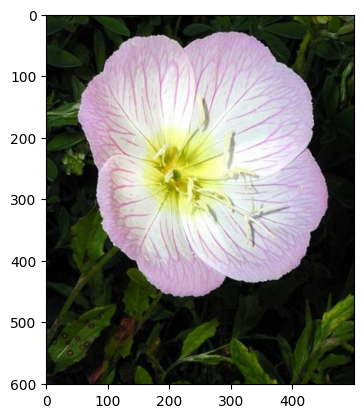

In [16]:
def imshow(image, ax = None, title = None):
  """Imshow for Tensor."""
  if ax is None:
    fig, ax = plt.subplots()

  # PyTorch tensors assume the color channel is the first dimension
  # but matplotlib assumes is the third dimension
  image = image.transpose(1, 2, 0)

  # Undo preprocessing

  mean = np.array([0.485, 0.456, 0.406])
  std = np.array([0.229, 0.224, 0.225])
  image = std * image + mean

  # Image needs to clipped between o and 1 or its looks like noise when displayed
  image = np.clip(image, 0, 1)

  ax.imshow(image)

  return ax


#Display the original and modified image
image_pth = 'flowers/test/1/image_06743.jpg'

# original
with Image.open(image_pth) as image:
  plt.imshow(image)

In [17]:
from torch.autograd import Variable
def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''

    # TODO: Implement the code to predict the class from an image file
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model.eval()
    model = model.to(device)

    # Process image
    image = process_image(image_path)
    image = process_image(image_path)
    image = image.unsqueeze(0)

    image = image.to(device)
    # Transfer to tensor
    #image = torch.from_numpy(np.array([image])).float()

    #image = image.to(device)

    output = model.forward(image)

    # Top probs
    probabilities = torch.exp(output).data

    top_probs, top_labs = probabilities.topk(topk)

    top_probs = top_probs.cpu().detach().numpy().tolist()[0]
    top_labs = top_labs.cpu().detach().numpy().tolist()[0]

    # Convert indices to classes
    idx_to_class = {val: key for key, val in model.class_to_idx.items()}
    top_labels = [idx_to_class[lab] for lab in top_labs]
        # Displays the category name
    index_to_class = {val:cat_to_name[k] for k, val in model.class_to_idx.items()}

    classes = [index_to_class[i] for i in top_labs]

    return top_probs,top_labels, classes



In [18]:
# Implement the predict function on an image
image_path = 'flowers/test/1/image_06743.jpg' # should be pink primrose

probs, labs, classes = predict(image_path, model)

print(probs)
print(labs)
print(classes)

[0.5258380174636841, 0.1179736778140068, 0.08945333957672119, 0.04462524503469467, 0.02817383222281933]
['83', '19', '1', '51', '18']
['hibiscus', 'balloon flower', 'pink primrose', 'petunia', 'peruvian lily']


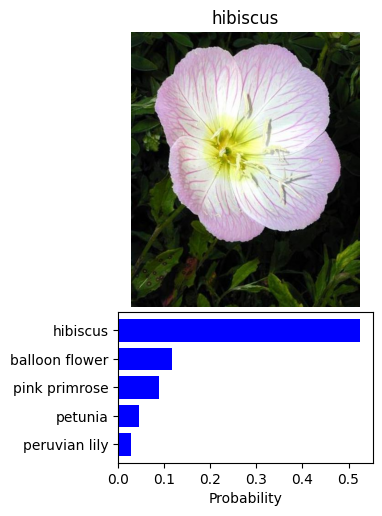

In [19]:
probs, labs, classes = predict(image_path, model)
max_index = np.argmax(probs)
max_probability = probs[max_index]
label = classes[max_index]

fig = plt.figure(figsize=(6,6))
ax1 = plt.subplot2grid((15,9), (0,0), colspan=9, rowspan=9)
ax2 = plt.subplot2grid((15,9), (9,2), colspan=5, rowspan=5)

image = Image.open(image_path)
ax1.axis('off')
ax1.set_title(label)
ax1.imshow(image)

y_pos = np.arange(5)
ax2.set_yticks(y_pos)
ax2.set_yticklabels(classes)
ax2.set_xlabel('Probability')
ax2.invert_yaxis()
ax2.barh(y_pos, probs, xerr=0, align='center', color='blue')

plt.show()